<a href="https://colab.research.google.com/github/lydia-r/Data-projects/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project One

Lydia Akalu
Professor Abdirisak Mohamed   
Data 201   
October 30, 2025

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

The dataset used for this project is sourced from the Spotify Songs Database, which contains information about 2,000 tracks collected from Spotify’s music catalog. Spotify provides detailed audio features for each song such as danceability, energy, valence, tempo, loudness, and instrumentalness along with contextual data like artist name, release year, popularity, and whether a track is explicit.

The goal of this project is to explore patterns and trends in modern music using descriptive statistics and visualization techniques. By applying data analysis and visualization tools, we can better understand what makes a song popular, how song characteristics have evolved over time, and how different musical features relate to one another.

Questions

1.   Who are the most popular artists
2.   What is the relationship between energy and loudness
3. who are the top ten artists with the highest instrumentals
4. How do key Spotify audio features: such as danceability, energy, valence, and instrumentalness compare in their overall distributions?



In [14]:
df = pd.read_csv('/content/spotifysongs.csv')
df.head(5)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [15]:
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


In [16]:
df['duration_ms'].median()# is in milliseconds when converted it will be 3.7213 minutes

223279.5

In [17]:
df.shape

(2000, 18)

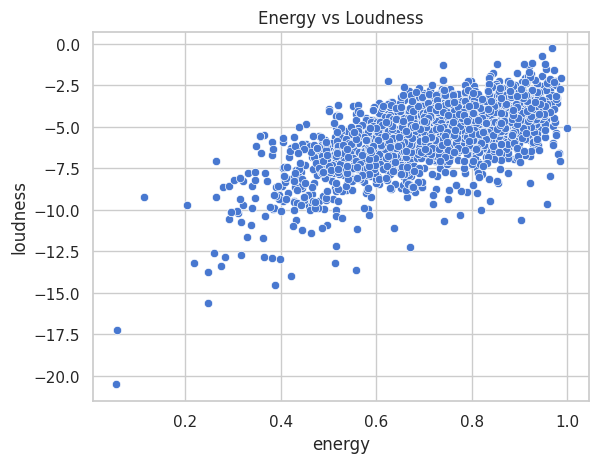

In [28]:
# realtionship between energy and loudness
sns.scatterplot(x='energy', y='loudness', data=df)
plt.title('Energy vs Loudness')
plt.show()

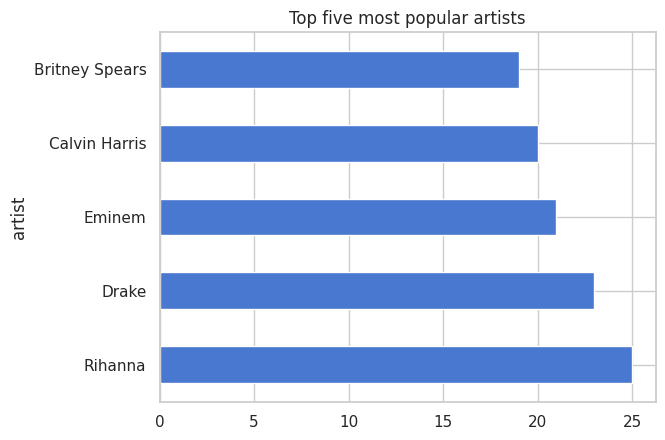

In [29]:
# Top five most popular artists
top_artists= df.groupby('artist').count().sort_values(by='song', ascending= False)['song'][:5]
top_artists.plot.barh()
plt.title('Top five most popular artists')
plt.show()

Text(0.5, 1.0, 'Top ten artists with higest instrumentalness')

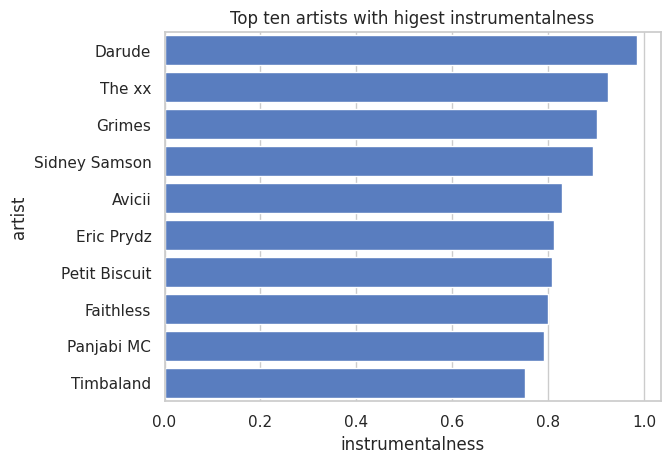

In [34]:
# Top ten artists with instrumental songs
Top_instrumental= df[['instrumentalness','song', 'artist']].sort_values(by= 'instrumentalness', ascending= False)[:10]
sns.barplot(x='instrumentalness',y='artist', data = Top_instrumental)
plt.title('Top ten artists with higest instrumentalness')

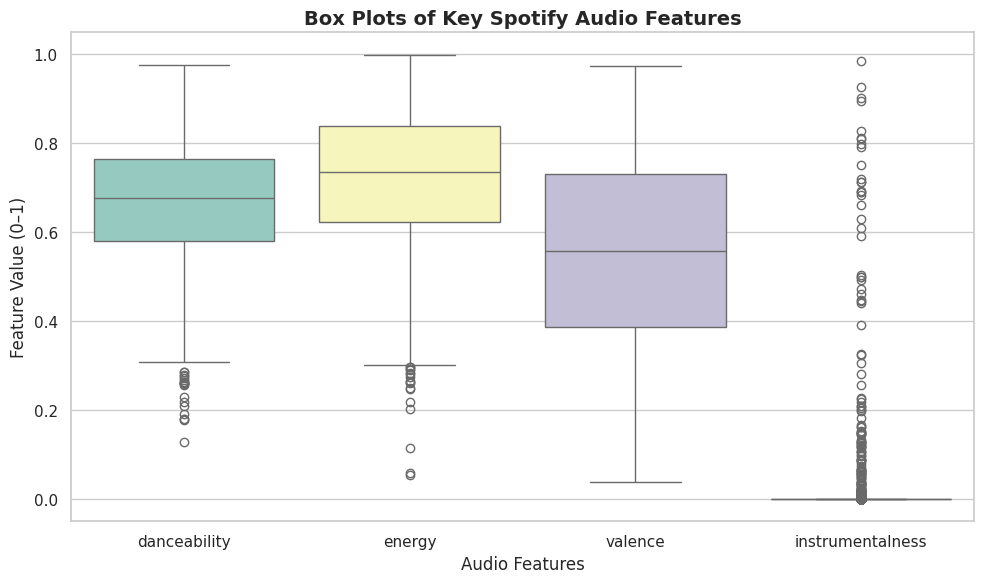

In [31]:
# Box plots for multiple Spotify features
features = ['danceability', 'energy', 'valence', 'instrumentalness']

# Keep only the columns that exist in your dataframe
features = [f for f in features if f in df.columns]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[features], palette='Set3')
plt.title('Box Plots of Key Spotify Audio Features', fontsize=14, weight='bold')
plt.ylabel('Feature Value (0–1)')
plt.xlabel('Audio Features')
plt.tight_layout()
plt.show()

Energy has the highest median among all features most Spotify songs are upbeat and intense.

Valence varies widely, suggesting the dataset includes both cheerful and melancholic tracks.

Instrumentalness is heavily skewed toward 0, confirming that vocal tracks dominate Spotify’s popular catalog.

Danceability is moderately high, aligning with mainstream trends toward rhythmic, danceable music

In [35]:
# 10% of the total number of rows in the dataset
sample_size = int(0.1 * len(df))

# Randomly sample 10% of the rows from the dataset
sampled_df = df.sample(n=sample_size, random_state=42)

# sampled data
print(sampled_df.head())

# Step 1: Randomly sample 10% of the data
sample_size = int(0.1 * len(df))
sample_df = df.sample(n=sample_size, random_state=42)

            artist          song  duration_ms  explicit  year  popularity  \
1860  Charlie Puth      How Long       200853     False  2018          72   
353        50 Cent  21 Questions       224440      True  2003          72   
1333      Flo Rida         I Cry       223800     False  2012          60   
905   Taylor Swift    Love Story       236266     False  2008          74   
1289         Drake     The Motto       181573      True  2011          74   

      danceability  energy  key  loudness  mode  speechiness  acousticness  \
1860         0.845   0.561    1    -5.253     0       0.0778      0.211000   
353          0.646   0.813    6    -3.846     0       0.2990      0.349000   
1333         0.693   0.822    4    -5.441     0       0.0439      0.006160   
905          0.617   0.741    2    -3.970     1       0.0311      0.131000   
1289         0.766   0.442    1    -8.558     1       0.3560      0.000107   

      instrumentalness  liveness  valence    tempo              genr

In [36]:
# Step 1: Randomly sample 10% of the data
sample_size = int(0.1 * len(df))
sample_df = df.sample(n=sample_size, random_state=42)

duration_sample = sample_df['duration_ms'].dropna()

bootstrap_medians = []
n_iterations = 10000

for _ in range(n_iterations):
    resample = np.random.choice(duration_sample, size=len(duration_sample), replace=True)
    bootstrap_medians.append(np.median(resample))

np.mean(bootstrap_medians)
lower = np.percentile(bootstrap_medians, 2.5)
upper = np.percentile(bootstrap_medians, 97.5)
median_est = np.mean(bootstrap_medians)

print(f"Estimated Median (Duration): {median_est}")
print(f"95% Confidence Interval: ({lower}, {upper})")

Estimated Median (Duration): 221712.26385
95% Confidence Interval: (214247.0, 226660.0)


We are 95% confident that the true median song duration in the Spotify dataset lies between 214247.0, and 226660 milliseconds.

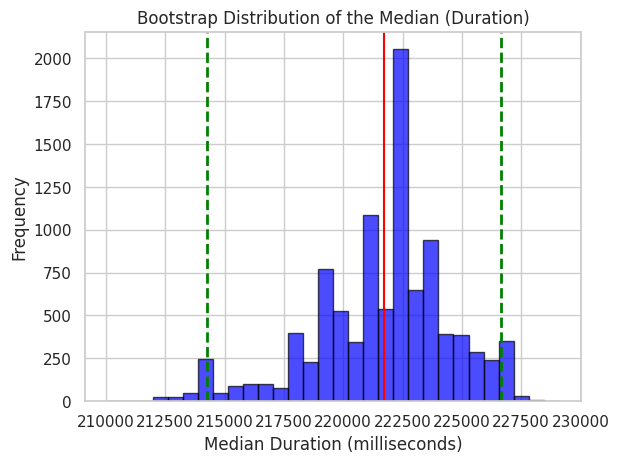

In [38]:
plt.hist(bootstrap_medians, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.axvline(median_est, color='red')
plt.axvline(lower, color='green', linestyle='dashed', linewidth=2)
plt.axvline(upper, color='green', linestyle='dashed', linewidth=2)
plt.title('Bootstrap Distribution of the Median (Duration)')
plt.xlabel('Median Duration (milliseconds)')
plt.ylabel('Frequency')
plt.show()

In this analysis, we performed a nonparametric bootstrap inference to estimate the true median song duration in the Spotify dataset. We began by randomly sampling 10% of the total data to create a representative subset. From this sample, we repeatedly (10,000 times) drew resamples with replacement, calculating the median duration for each resample. This process generated a distribution of bootstrap medians, which we then used to construct a 95% confidence interval for the population median. The histogram of these bootstrap medians visually represents the variability of the median estimates, with red and green lines marking the estimated median and confidence bounds, respectively. In conclusion, this approach allowed us to infer, with 95% confidence, the range within which the true median duration of all songs in the dataset likely falls, without assuming any specific underlying distribution for the data